In [1]:
import fcsparser

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing Libraries

import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA


import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [67]:
# Importing data

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    return data, fcsp.parse(path, meta_data_only=False, reformat_meta=True)[0]['_channels_']
 

'''
for dirname, _, filename in os.walk(HERE):
    for file in filename:
      path = os.path.join()
        meta = fcsparser.parse(, meta_data_only=True, reformat_meta=True)
'''

def prepData(x,scaler=None):
        """
        Normalize data
        """
        if not scaler:
                scaler = StandardScaler().fit(x)
        x_transformed= np.nan_to_num(np.array(scaler.transform(x)))
        return normalize(x_transformed),scaler

# Loading fcs file data into a dictionary
global path

dir = os.path.abspath(os.path.dirname("C:\\Users\\ankit\\OneDrive\\Desktop\\FCM data for Ankit\\NCD0_1.fcs"))
dir = os.path.join(dir, "C:\\Users\\ankit\\OneDrive\\Desktop\\FCM data for Ankit")
data, channels = load_data(dir)

# Function to return list of different taken samples
def sample_list(det = data):
    return set([sample[0:3] for sample in det.keys()])


# Function to check the dimensions of our fcs files
def checkDimensions(data, dimensions):
    for sample in data:
        if data[sample].shape != dimensions: print(sample, data[sample].shape)
    return 



---- loading data ---->


In [5]:
data

{'NCD0_1':               FSC-H         FSC-A         SSC-H         SSC-A       FITC-H  \
 0      11844.400391   7727.399902   8515.299805   9888.000000   337.700012   
 1      89443.296875  71343.500000  35189.800781  32058.400391   569.599976   
 2      10688.299805   7457.100098  19695.699219  14822.299805   420.399994   
 3      17322.099609  11629.400391   2541.100098  -1496.199951   262.799988   
 4      10445.400391   9484.500000   9146.200195   9293.099609   359.399994   
 ...             ...           ...           ...           ...          ...   
 99995  11927.400391  15681.299805   6936.700195  10506.599609   375.600006   
 99996  38101.898438  20734.699219  72517.898438  63397.898438  1001.400024   
 99997  12393.299805   2006.000000   1941.699951  -9002.900391   290.899994   
 99998  18304.500000   2168.100098  37398.199219  25292.500000   330.899994   
 99999  12559.200195   7027.000000   6800.700195   4074.699951   707.500000   
 
            FITC-A         PE-H         

In [6]:
checkDimensions(data,data[random.choice(list(data.keys()))].shape)

In [7]:
#concatenating the dataframes of all triplicates -->
def triplicates_combined(data = data):
    deta = {}
    for key in data.keys():
        deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
    return deta

triplicates_combined()

{'NCD0':               FSC-H         FSC-A         SSC-H         SSC-A      FITC-H  \
 0      11844.400391   7727.399902   8515.299805   9888.000000  337.700012   
 1      89443.296875  71343.500000  35189.800781  32058.400391  569.599976   
 2      10688.299805   7457.100098  19695.699219  14822.299805  420.399994   
 3      17322.099609  11629.400391   2541.100098  -1496.199951  262.799988   
 4      10445.400391   9484.500000   9146.200195   9293.099609  359.399994   
 ...             ...           ...           ...           ...         ...   
 99995  14696.299805   8557.099609    934.000000  -6183.700195  408.799988   
 99996  21699.800781  15053.500000  25606.599609  29446.000000  654.200012   
 99997  17462.800781  13297.700195  12090.900391  13833.000000  276.299988   
 99998  53353.800781  45164.699219  23538.400391  32447.699219  491.600006   
 99999  89968.500000  79134.000000  24345.800781  25739.500000  308.500000   
 
            FITC-A         PE-H         PE-A       PC5

In [8]:
channels

,$PnN,$PnS,$PnR,$PnB,$PnE,$PnG
Channel Number,,,,,,
1,FSC-H,FSC-H,16777216,32,"[0, 0]",1.0
2,FSC-A,FSC-A,16777216,32,"[0, 0]",1.0
3,SSC-H,SSC-H,16777216,32,"[0, 0]",1.0
4,SSC-A,SSC-A,16777216,32,"[0, 0]",1.0
5,FL1-H,FITC-H,16777216,32,"[0, 0]",1.0
6,FL1-A,FITC-A,16777216,32,"[0, 0]",1.0
7,FL2-H,PE-H,16777216,32,"[0, 0]",1.0
8,FL2-A,PE-A,16777216,32,"[0, 0]",1.0
9,FL3-H,PC5.5-H,16777216,32,"[0, 0]",1.0


In [9]:
data.keys()

dict_keys(['NCD0_1', 'NCD0_2', 'NCD0_3', 'NCD1_1', 'NCD1_2', 'NCD1_3', 'NCD2_1', 'NCD2_2', 'NCD2_3', 'NCD3_1', 'NCD3_2', 'NCD3_3', 'NCD4_1', 'NCD4_2', 'NCD4_3', 'NCD5_1', 'NCD5_2', 'NCD5_3', 'NCD6_1', 'NCD6_2', 'NCD6_3', 'NCD7_1', 'NCD7_2', 'NCD7_3', 'NCD8_1', 'NCD8_2', 'NCD8_3', 'NCD9_1', 'NCD9_2', 'NCD9_3', 'NHD0_1', 'NHD0_2', 'NHD0_3', 'NHD1_1', 'NHD1_2', 'NHD1_3', 'NHD2_1', 'NHD2_2', 'NHD2_3', 'NHD3_1', 'NHD3_2', 'NHD3_3', 'NHD4_1', 'NHD4_2', 'NHD4_3', 'NHD5_1', 'NHD5_2', 'NHD5_3', 'NHD6_1', 'NHD6_2', 'NHD6_3', 'NHD7_1', 'NHD7_2', 'NHD7_3', 'NHD8_1', 'NHD8_2', 'NHD8_3', 'NHD9_1', 'NHD9_2', 'NHD9_3', 'NLD0_1', 'NLD0_2', 'NLD0_3', 'NLD1_1', 'NLD1_2', 'NLD1_3', 'NLD2_1', 'NLD2_2', 'NLD2_3', 'NLD3_1', 'NLD3_2', 'NLD3_3', 'NLD4_1', 'NLD4_2', 'NLD4_3', 'NLD5_1', 'NLD5_2', 'NLD5_3', 'NLD6_1', 'NLD6_2', 'NLD6_3', 'NLD7_1', 'NLD7_2', 'NLD7_3', 'NLD8_1', 'NLD8_2', 'NLD8_3', 'NLD9_1', 'NLD9_2', 'NLD9_3', 'NMD0_1', 'NMD0_2', 'NMD0_3', 'NMD1_1', 'NMD1_2', 'NMD1_3', 'NMD2_1', 'NMD2_2', 'NMD2_3',

In [10]:
Day_1 = dict([(key,data[key]) for key in data.keys() if key.endswith('_1')])
Day_1.keys()

dict_keys(['NCD0_1', 'NCD1_1', 'NCD2_1', 'NCD3_1', 'NCD4_1', 'NCD5_1', 'NCD6_1', 'NCD7_1', 'NCD8_1', 'NCD9_1', 'NHD0_1', 'NHD1_1', 'NHD2_1', 'NHD3_1', 'NHD4_1', 'NHD5_1', 'NHD6_1', 'NHD7_1', 'NHD8_1', 'NHD9_1', 'NLD0_1', 'NLD1_1', 'NLD2_1', 'NLD3_1', 'NLD4_1', 'NLD5_1', 'NLD6_1', 'NLD7_1', 'NLD8_1', 'NLD9_1', 'NMD0_1', 'NMD1_1', 'NMD2_1', 'NMD3_1', 'NMD4_1', 'NMD5_1', 'NMD6_1', 'NMD7_1', 'NMD8_1', 'NMD9_1', 'OHD0_1', 'OHD1_1', 'OHD2_1', 'OHD3_1', 'OHD4_1', 'OHD5_1', 'OHD6_1', 'OHD7_1', 'OHD8_1', 'OHD9_1', 'OLD0_1', 'OLD1_1', 'OLD2_1', 'OLD3_1', 'OLD4_1', 'OLD5_1', 'OLD6_1', 'OLD7_1', 'OLD8_1', 'OLD9_1', 'OMD0_1', 'OMD1_1', 'OMD2_1', 'OMD3_1', 'OMD4_1', 'OMD5_1', 'OMD6_1', 'OMD7_1', 'OMD8_1', 'OMD9_1', 'PCD0_1', 'PCD1_1', 'PCD2_1', 'PCD3_1', 'PCD4_1', 'PCD5_1', 'PCD6_1', 'PCD7_1', 'PCD8_1', 'PCD9_1'])

In [11]:
Day_1

{'NCD0_1':               FSC-H         FSC-A         SSC-H         SSC-A       FITC-H  \
 0      11844.400391   7727.399902   8515.299805   9888.000000   337.700012   
 1      89443.296875  71343.500000  35189.800781  32058.400391   569.599976   
 2      10688.299805   7457.100098  19695.699219  14822.299805   420.399994   
 3      17322.099609  11629.400391   2541.100098  -1496.199951   262.799988   
 4      10445.400391   9484.500000   9146.200195   9293.099609   359.399994   
 ...             ...           ...           ...           ...          ...   
 99995  11927.400391  15681.299805   6936.700195  10506.599609   375.600006   
 99996  38101.898438  20734.699219  72517.898438  63397.898438  1001.400024   
 99997  12393.299805   2006.000000   1941.699951  -9002.900391   290.899994   
 99998  18304.500000   2168.100098  37398.199219  25292.500000   330.899994   
 99999  12559.200195   7027.000000   6800.700195   4074.699951   707.500000   
 
            FITC-A         PE-H         

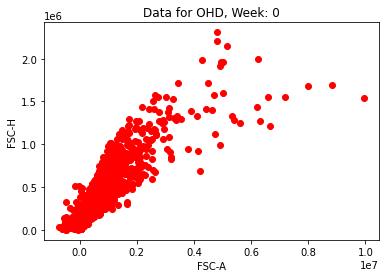

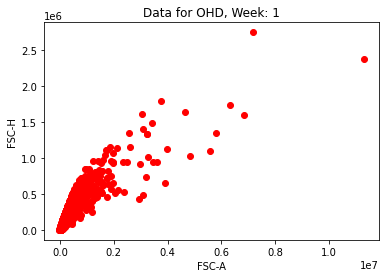

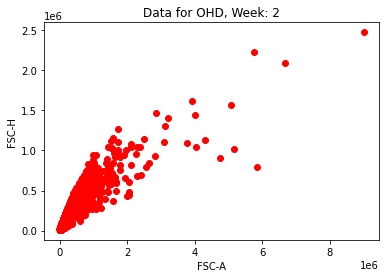

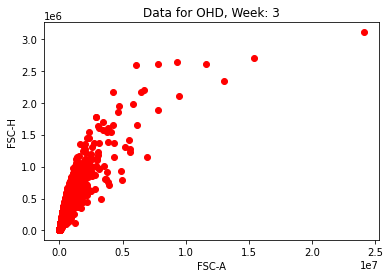

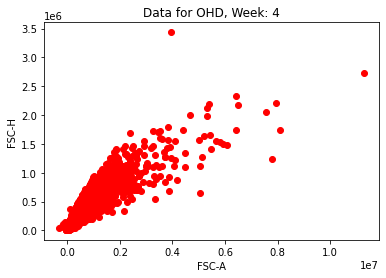

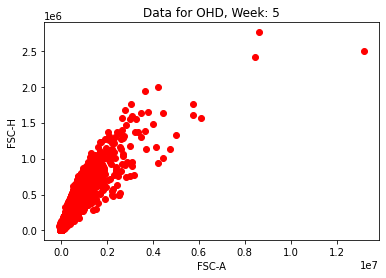

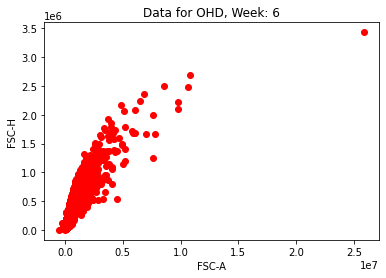

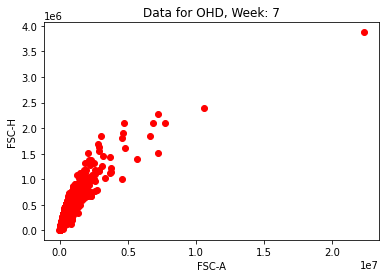

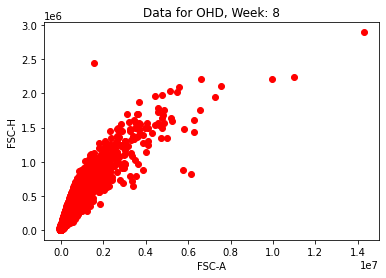

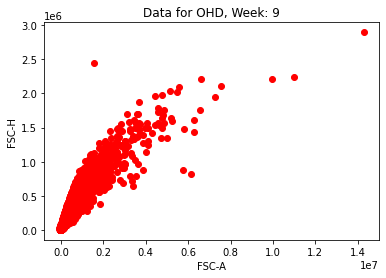

[None, None, None, None, None, None, None, None, None, None]

In [12]:
def plot_sample_data(data, key, day = 0):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.title(f'Data for {key}, Week: {day}')
    plt.show()
    

[plot_sample_data(data, 'OHD',i) for i in range(0,10)]

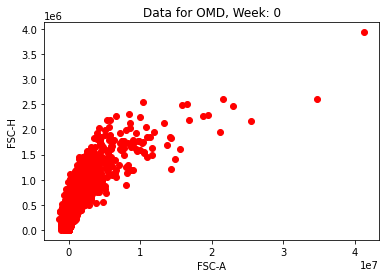

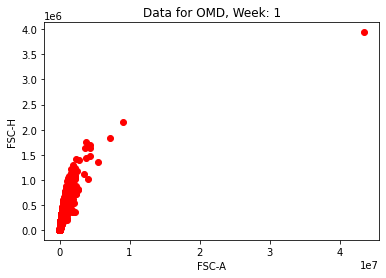

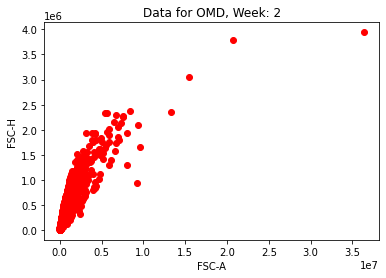

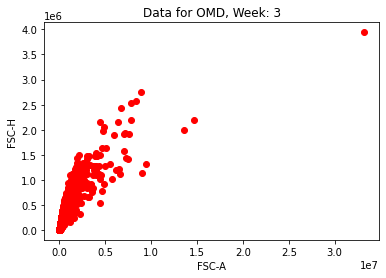

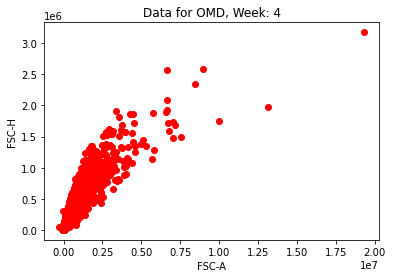

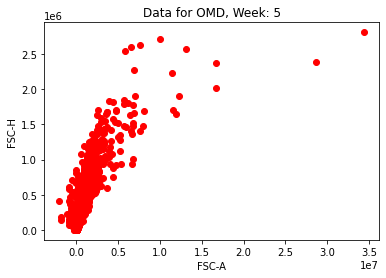

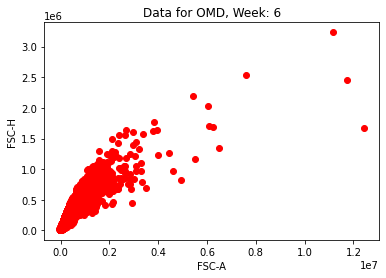

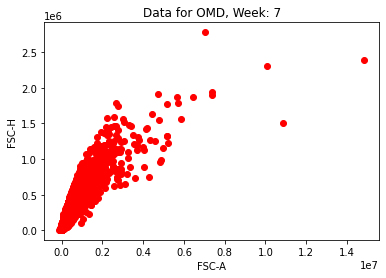

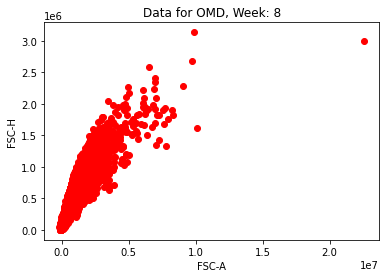

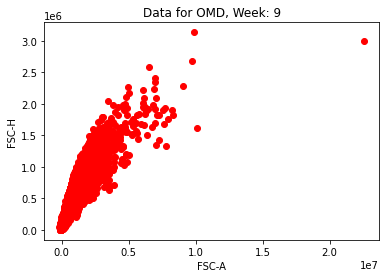

[None, None, None, None, None, None, None, None, None, None]

In [13]:
def plot_sample_data(data, key, day = 0):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.title(f'Data for {key}, Week: {day}')
    plt.show()
    

[plot_sample_data(data, 'OMD',i) for i in range(0,10)]

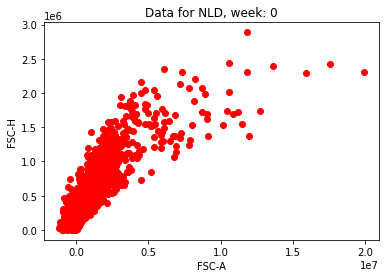

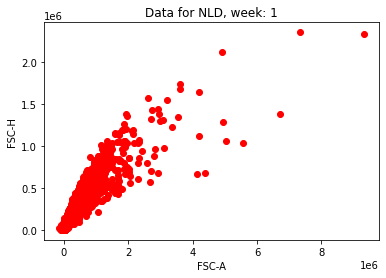

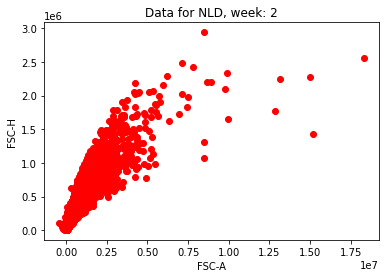

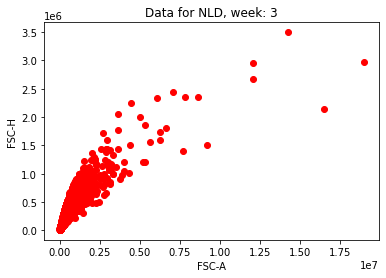

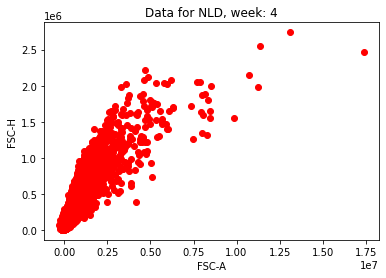

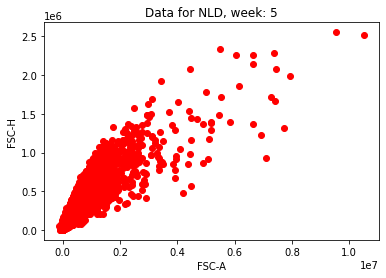

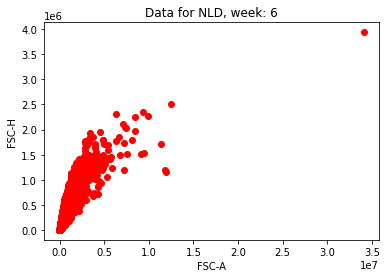

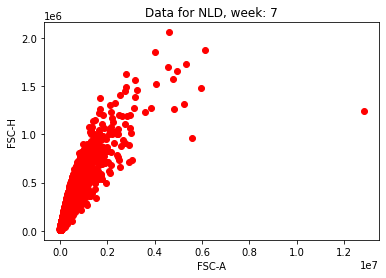

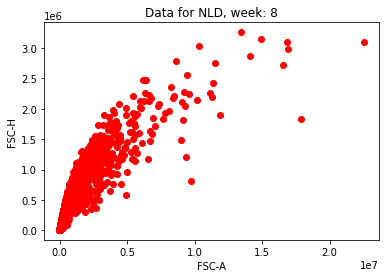

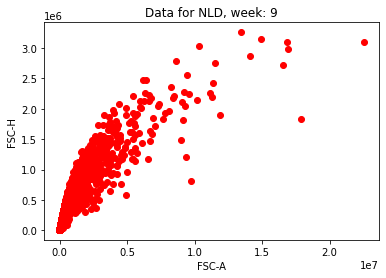

[None, None, None, None, None, None, None, None, None, None]

In [14]:
def plot_sample_data(data, key, day = 0):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.title(f'Data for {key}, week: {day}')
    plt.show()
    

[plot_sample_data(data,'NLD',i) for i in range(0,10)]

(3000000, 18)


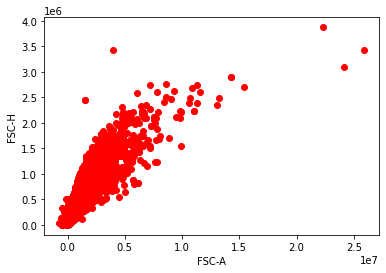

In [15]:
# function to plot combined data of all weeks(0-9) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(0,10):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.show()

plot_sample(data,'OHD')

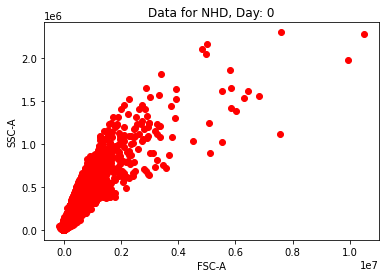

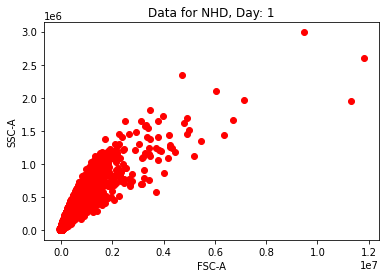

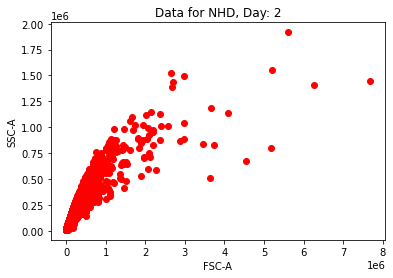

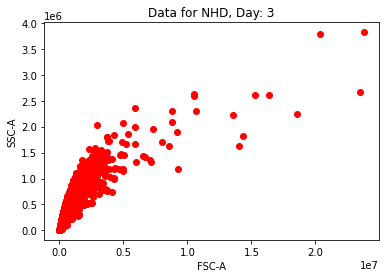

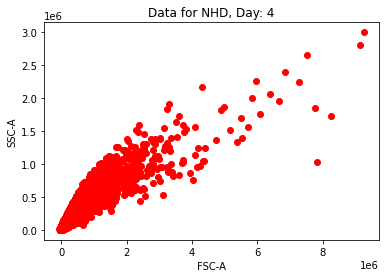

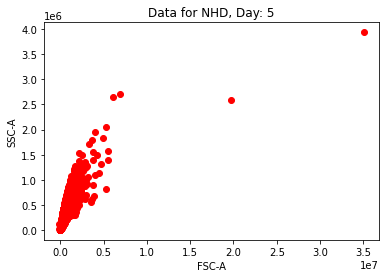

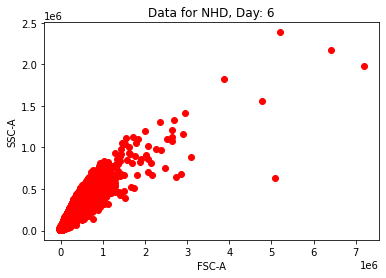

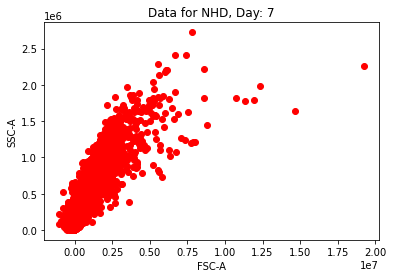

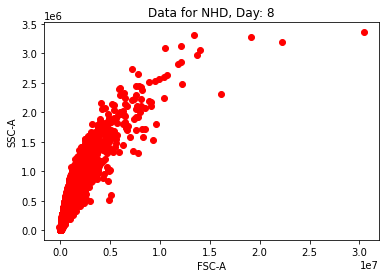

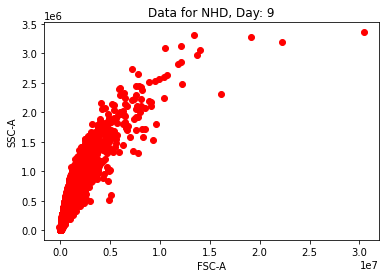

[None, None, None, None, None, None, None, None, None, None]

In [16]:
def plot_sample_data(data, key, day = 1):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('SSC-A')
    plt.title(f'Data for {key}, Day: {day}')
    plt.show()
    

[plot_sample_data(data, 'NHD',i) for i in range(0,10)]

(3000000, 18)


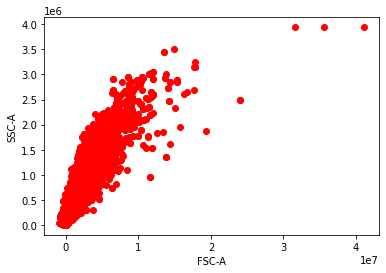

In [17]:
# function to plot combined data of all WEEKS(0-9) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(0,10):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('SSC-A')
    plt.show()

plot_sample(data,'OLD')

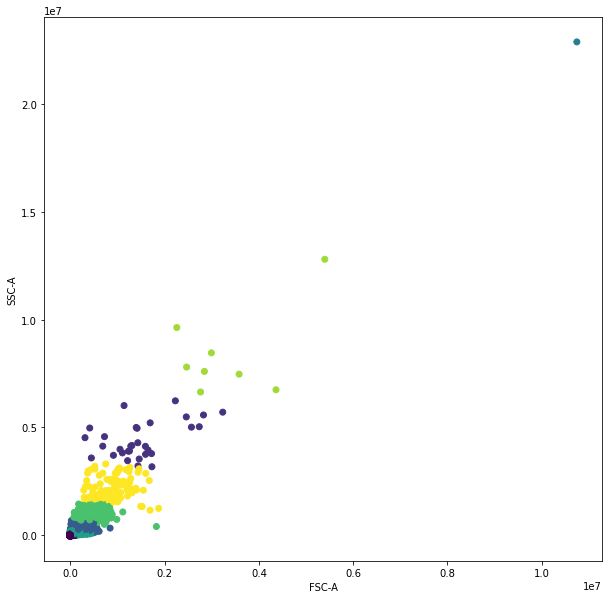

In [18]:
# Running Clustering with feature vector of size 3 in place of 3000 feature vector

num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("SSC-A")

plt.show()


Cluster 1 Inertia 3832200675983360.0
Cluster 2 Inertia 2145379919331328.0
Cluster 3 Inertia 1330845277224960.0
Cluster 4 Inertia 922634472652800.0
Cluster 5 Inertia 640369960157184.0
Cluster 6 Inertia 456551567458304.0
Cluster 7 Inertia 358765530447872.0
Cluster 8 Inertia 292073412493312.0
Cluster 9 Inertia 246557060366336.0
Cluster 10 Inertia 213784597626880.0
Cluster 11 Inertia 190007759339520.0
Cluster 12 Inertia 166662783369216.0
Cluster 13 Inertia 150113401962496.0
Cluster 14 Inertia 136477233119232.0
Cluster 15 Inertia 127476852326400.0
Cluster 16 Inertia 120653793460224.0
Cluster 17 Inertia 114157252771840.0
Cluster 18 Inertia 108543193645056.0
Cluster 19 Inertia 103718292815872.0


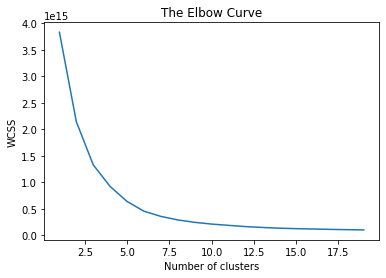

In [19]:
def elbow_curve(sample = sample):
    wcss = []
    for i in range(1,20):
      kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
      kmeans.fit(sample)
      wcss.append(kmeans.inertia_)
      print('Cluster', i, 'Inertia', kmeans.inertia_,)
    plt.plot(range(1,20),wcss)
 
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

elbow_curve()

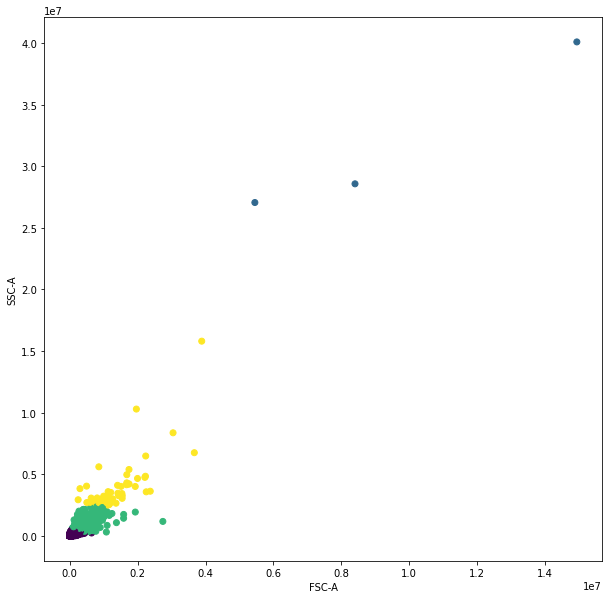

In [20]:
# Running Clustering with feature vector of size 3 in place of 3000 feature vector

num_clusters = 4
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("SSC-A")

plt.show()

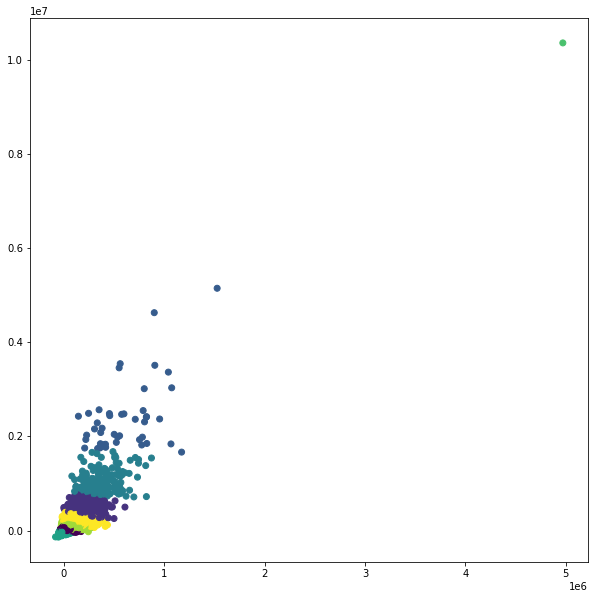

In [73]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, )
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 

plt.show()

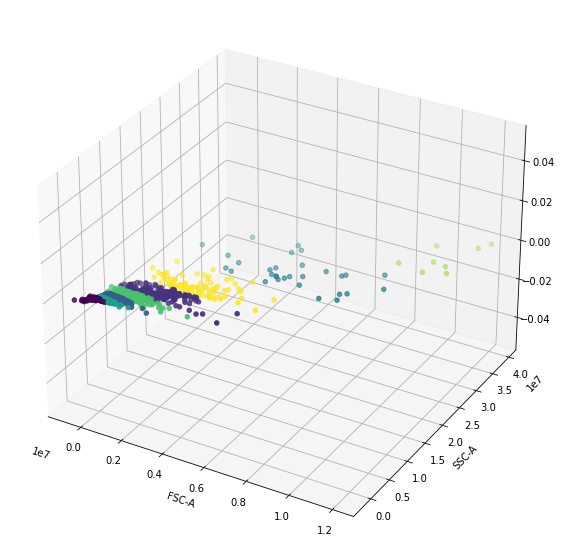

In [22]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data


cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d' )
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 
plt.xlabel("FSC-A", )
plt.ylabel("SSC-A",)

plt.show()

In [70]:
data.keys()
channels

,$PnN,$PnS,$PnR,$PnB,$PnE,$PnG
Channel Number,,,,,,
1,FSC-H,FSC-H,16777216,32,"[0, 0]",1.0
2,FSC-A,FSC-A,16777216,32,"[0, 0]",1.0
3,SSC-H,SSC-H,16777216,32,"[0, 0]",1.0
4,SSC-A,SSC-A,16777216,32,"[0, 0]",1.0
5,FL1-H,FITC-H,16777216,32,"[0, 0]",1.0
6,FL1-A,FITC-A,16777216,32,"[0, 0]",1.0
7,FL2-H,PE-H,16777216,32,"[0, 0]",1.0
8,FL2-A,PE-A,16777216,32,"[0, 0]",1.0
9,FL3-H,PC5.5-H,16777216,32,"[0, 0]",1.0


In [24]:
from sklearn.metrics import silhouette_score

In [25]:
range_n_clusters = list (range(2,8))
print ("Number of clusters from 2 to 8: \n", range_n_clusters)

cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=num_clusters).fit(sample)
    preds = clusterer.predict(sample)
    centers = clusterer.cluster_centers_
    

    score = silhouette_score (sample, preds, metric='euclidean')
    print(score)
    #print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score)
plt.show()    

Number of clusters from 2 to 8: 
 [2, 3, 4, 5, 6, 7]
0.89034986
0.8907638
0.89034986
0.890187
0.890187
0.8901785


In [29]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [37]:
!pip install FlowCytometryTools

In [30]:
data=sample
print("FSC-A Skewness: {:.3f}".format(data["FSC-A"].skew()))
print("FSC-A Kurtosis: {:.3f}". format(data["FSC-A"].kurt()))
print("SSC-A Skewness: {:.3f}".format(data["SSC-A"].skew()))
print("SSC-A Kurtosis: {:.3f}". format(data["SSC-A"].kurt()))



FSC-A Skewness: 27.256
FSC-A Kurtosis: 1228.667
SSC-A Skewness: 30.195
SSC-A Kurtosis: 1370.564


In [38]:
import FlowCytometryTools

In [48]:
data

,FSC-A,SSC-A
0,29347.599609,4.419100e+04
1,35090.898438,3.790650e+04
2,11951.500000,2.313140e+04
3,700796.312500,1.297129e+06
4,7186.899902,1.457510e+04
...,...,...
99995,16550.500000,3.691410e+04
99996,10367.599609,9.024700e+03
99997,221438.703125,1.963101e+05
99998,53612.699219,1.044125e+05


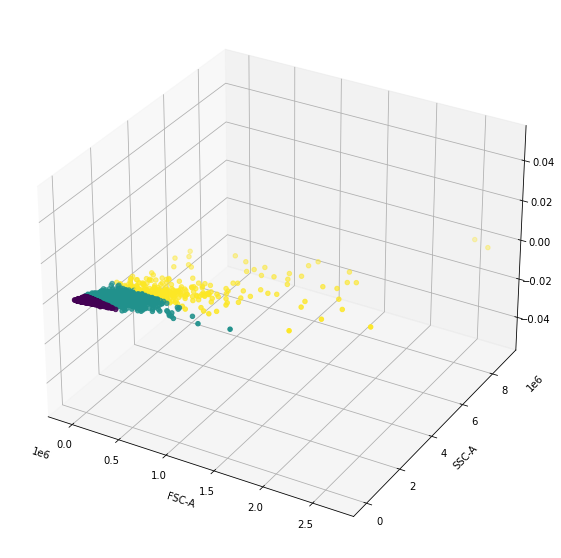

In [76]:
num_clusters = 3
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data


cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d' )
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 
plt.xlabel("FSC-A", )
plt.ylabel("SSC-A",)

plt.show()

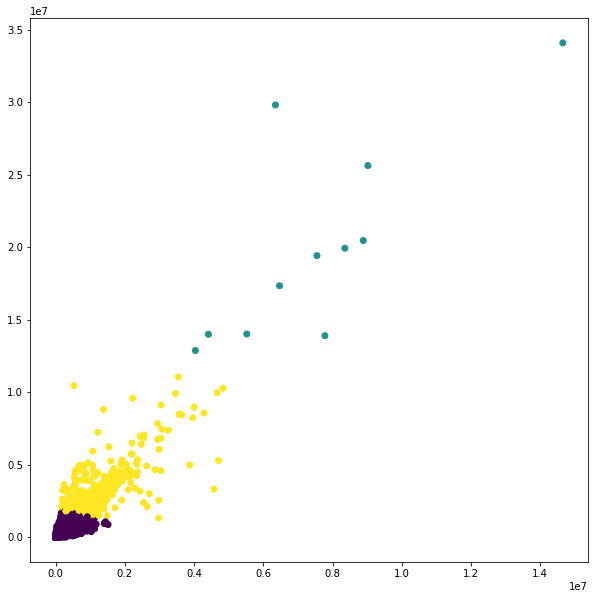

In [78]:
num_clusters = 3
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, )
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 

plt.show()